<a href="https://colab.research.google.com/github/PareshRP/Customer_Segmentation_R/blob/main/Cutomer_Segmentation_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation in R implementing K-means Algorithm**

In [116]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



In [117]:
#load the data
customer_data=read.csv("/content/sample_data/Mall_Customers.csv")
str(customer_data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [118]:
#columns names
names(customer_data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [119]:
#visualize data
head(customer_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [120]:
#quick summary of data and some statistical value of features of Age
summary(customer_data$Age)
sd(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

In [121]:
#quick summary of data and some statistical value of features of Annual Income
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

In [122]:
#quick summary of data and some statistical value of features of Spending Score
summary(customer_data$Spending.Score..1.100.)
sd(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

[1] 25.82352

**Customer Gender Visualization**

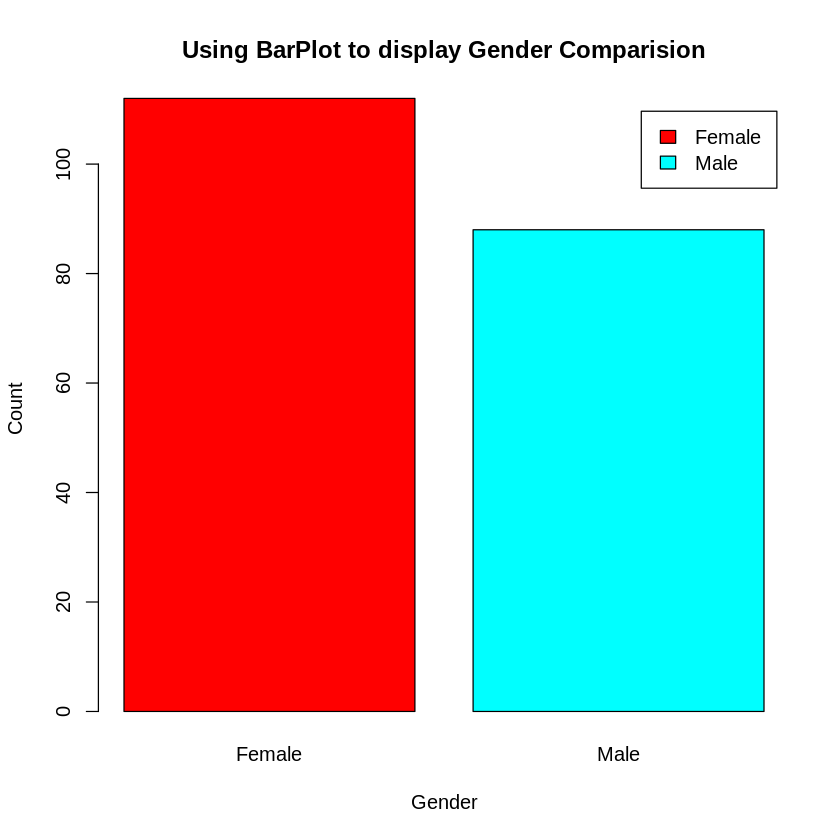

In [123]:
#plot
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

In [124]:
install.packages("plotrix") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [125]:
library(plotrix)

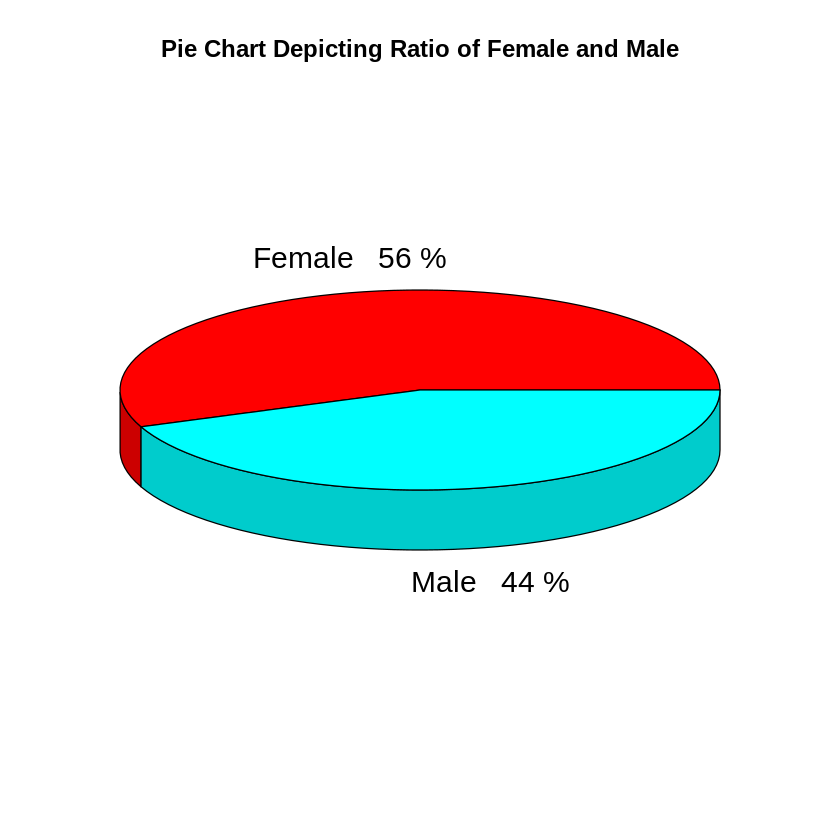

In [126]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs, main="Pie Chart Depicting Ratio of Female and Male")

**Visualization of Age Distribution**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

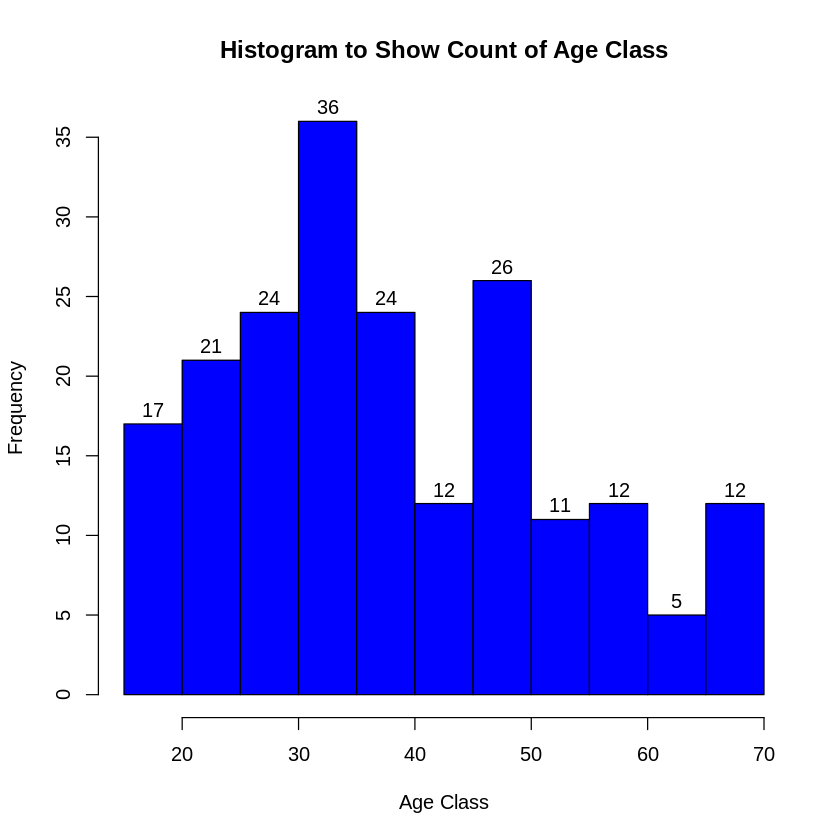

In [127]:
#Age
summary(customer_data$Age)
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

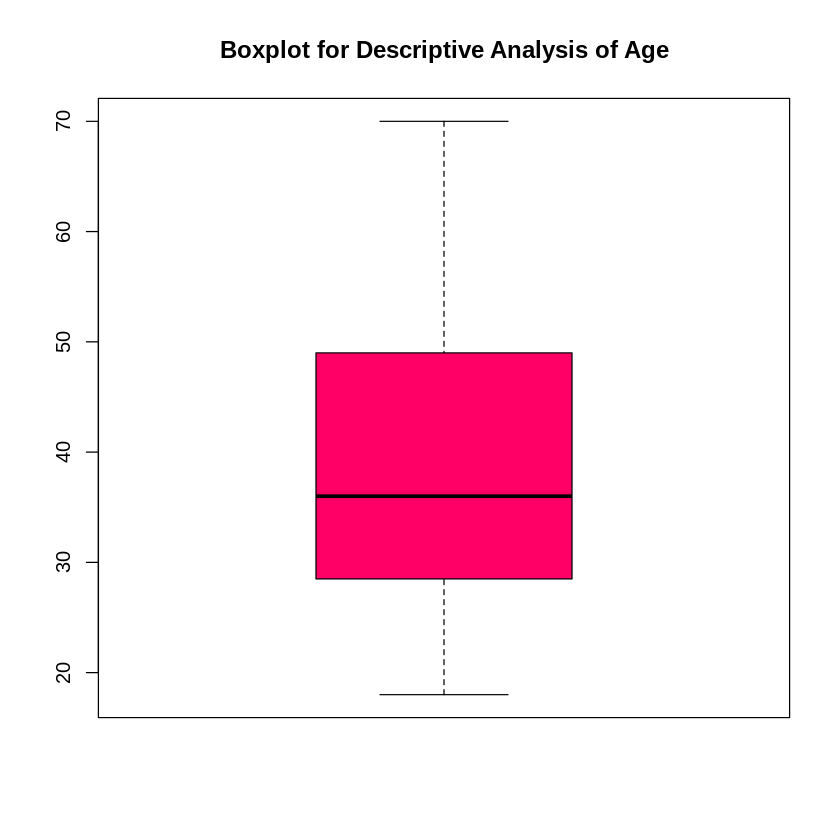

In [128]:
#boxplot for age
boxplot(customer_data$Age,
       col="#ff0066",
       main="Boxplot for Descriptive Analysis of Age")

**Analysis of the Annual Income of the Customers**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

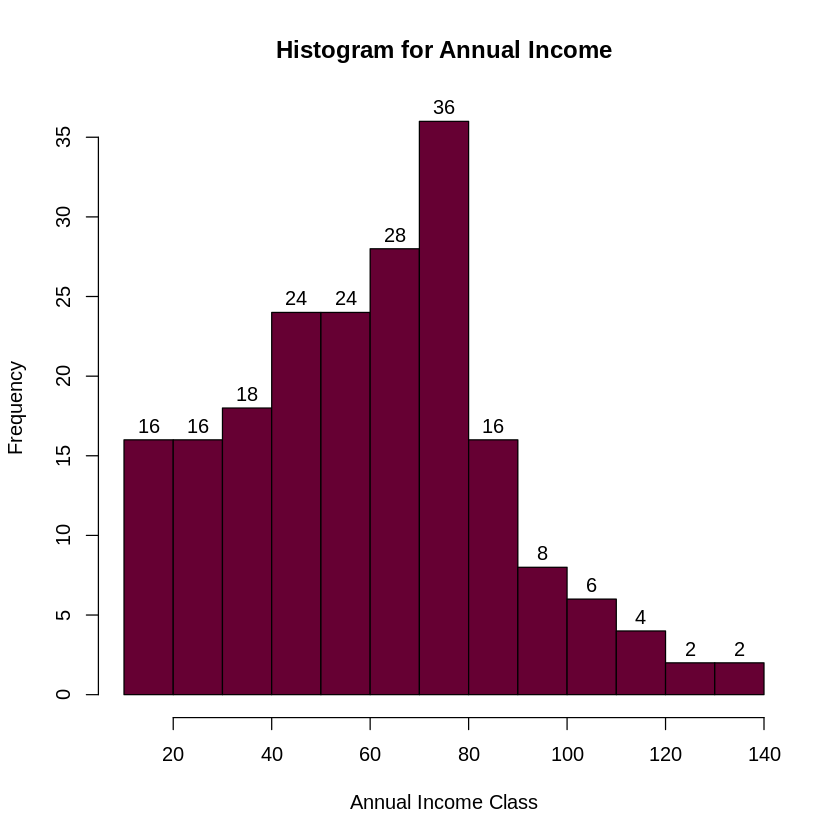

In [129]:
#Annual Income
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

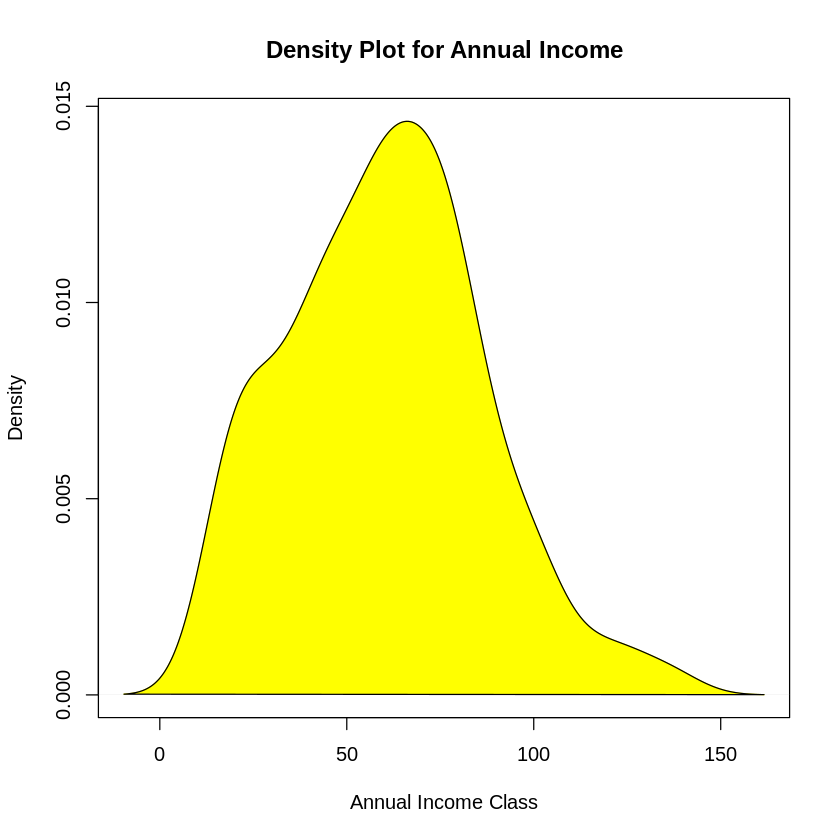

In [130]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="yellow")

**Analyzing Spending Score of the Customers**

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

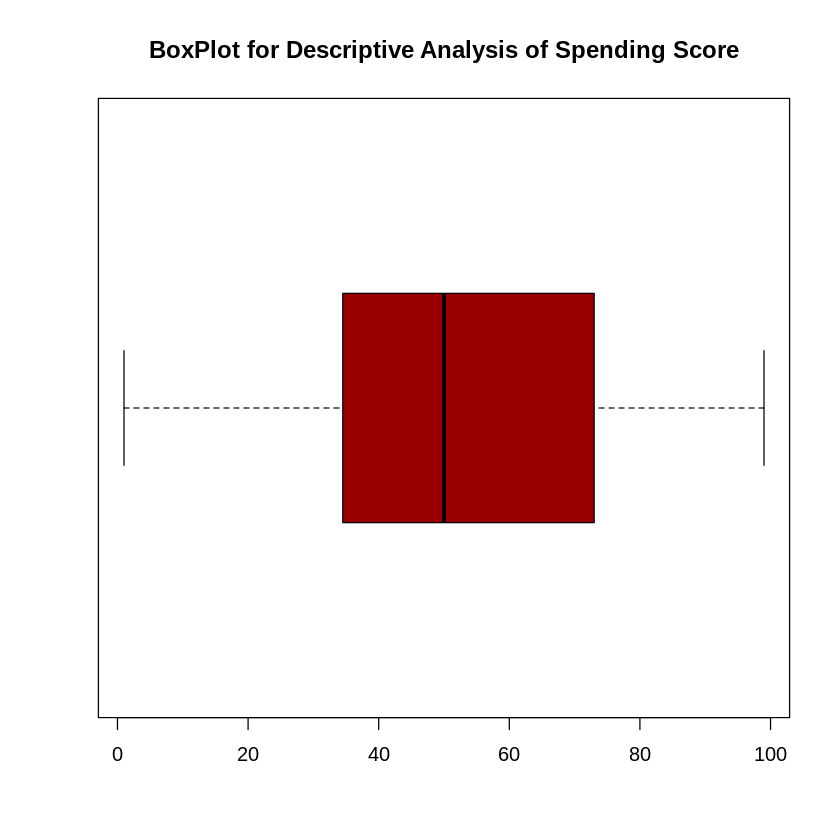

In [131]:
summary(customer_data$Spending.Score..1.100.)
boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score")

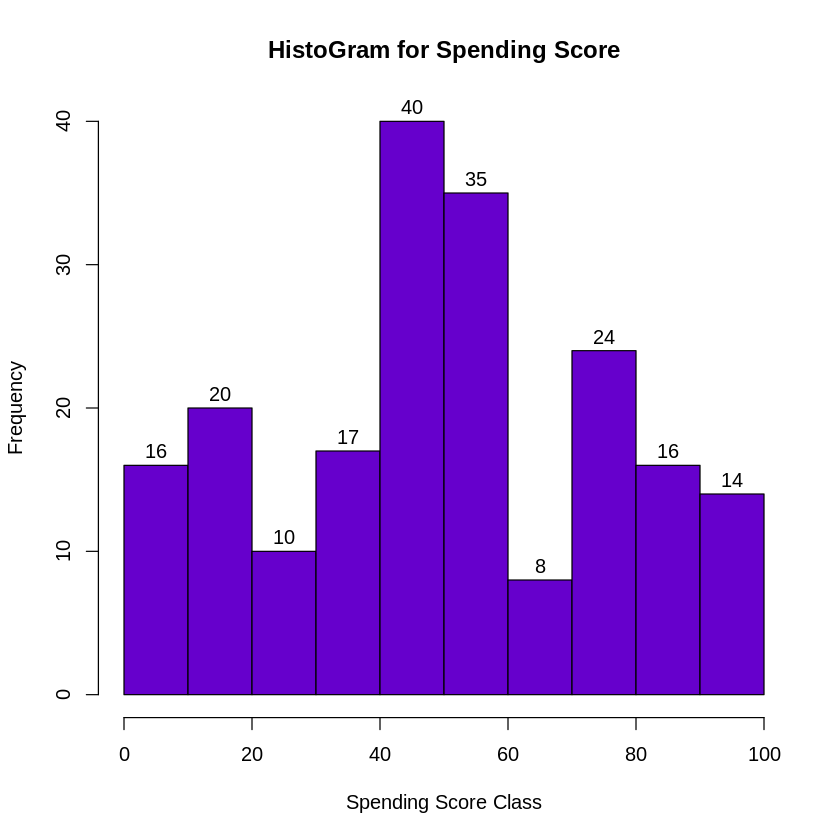

In [132]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

**K-means Algorithm**
1. Elbow method

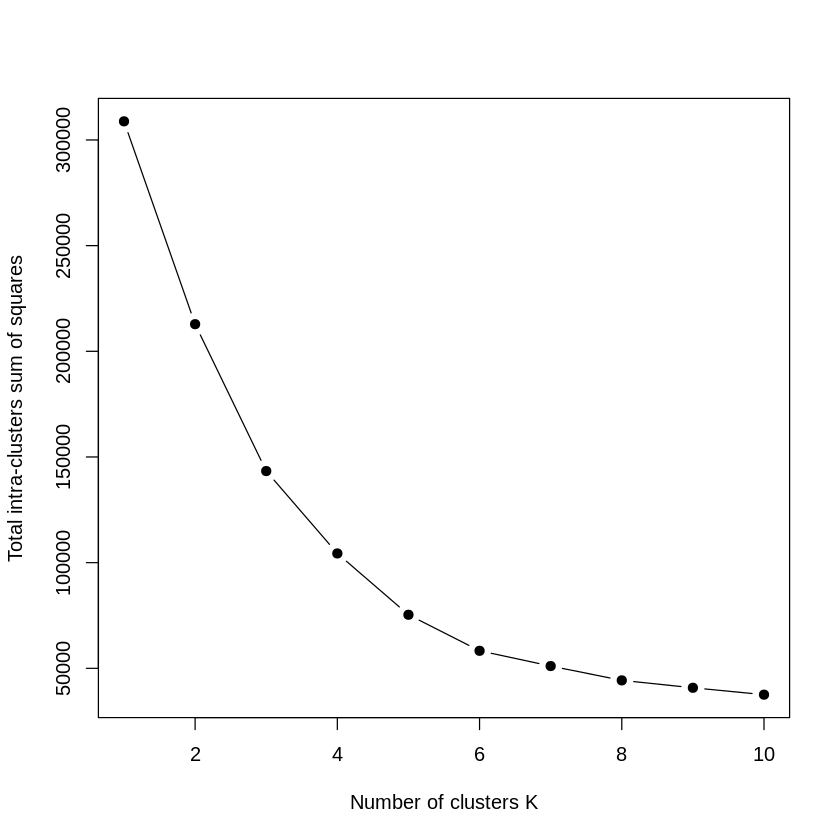

In [133]:
library(purrr)
set.seed(2)
# function to calculate total intra-cluster sum of square (Euclidean Distance)
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10

iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = TRUE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")
#4 clusters

**K-means Clustering**
2. Average Silhouette Method

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



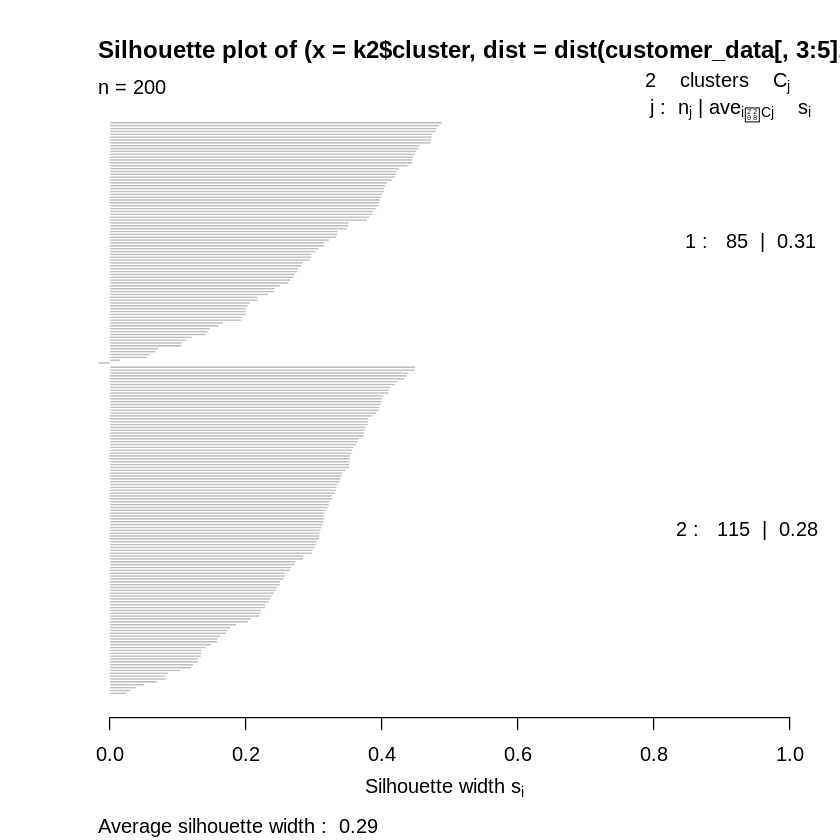

In [134]:
install.packages("gridExtra")
library(cluster) 
library(gridExtra)
library(grid)

k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

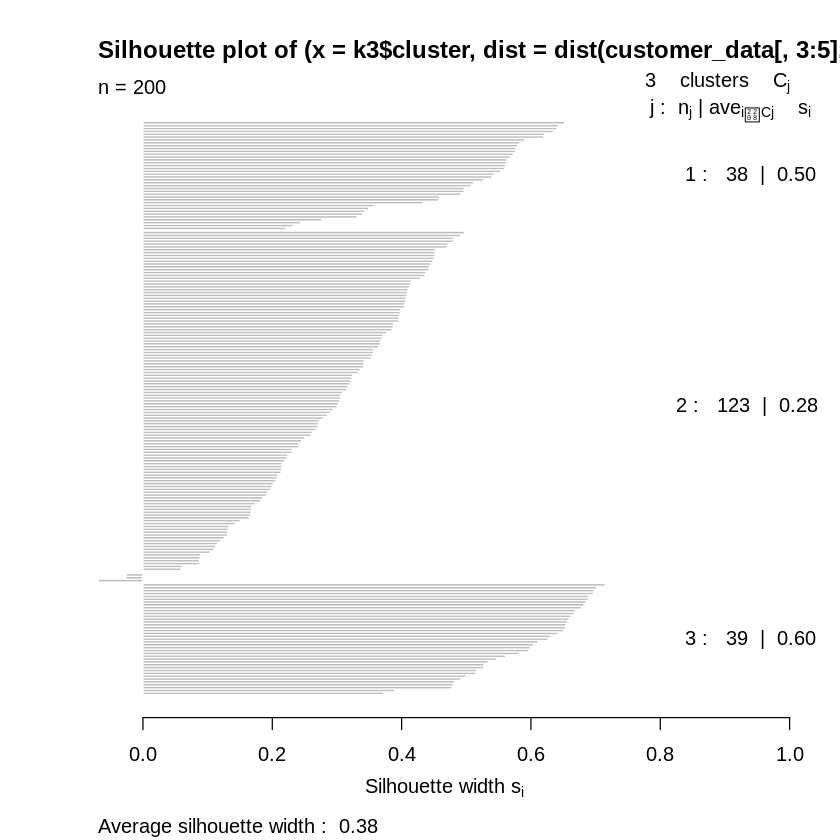

In [135]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

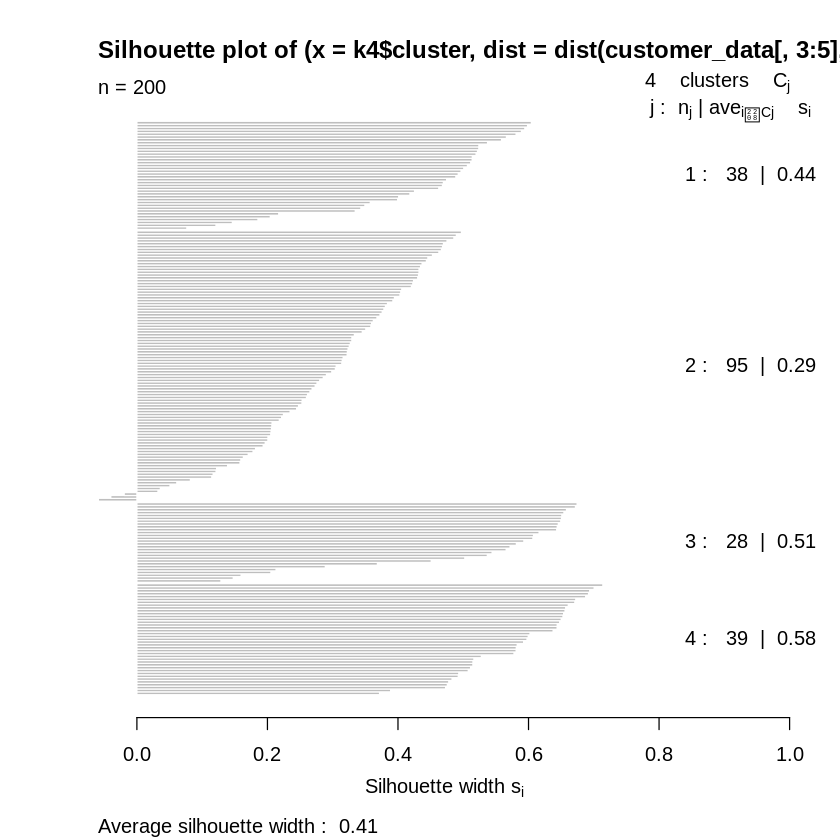

In [136]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

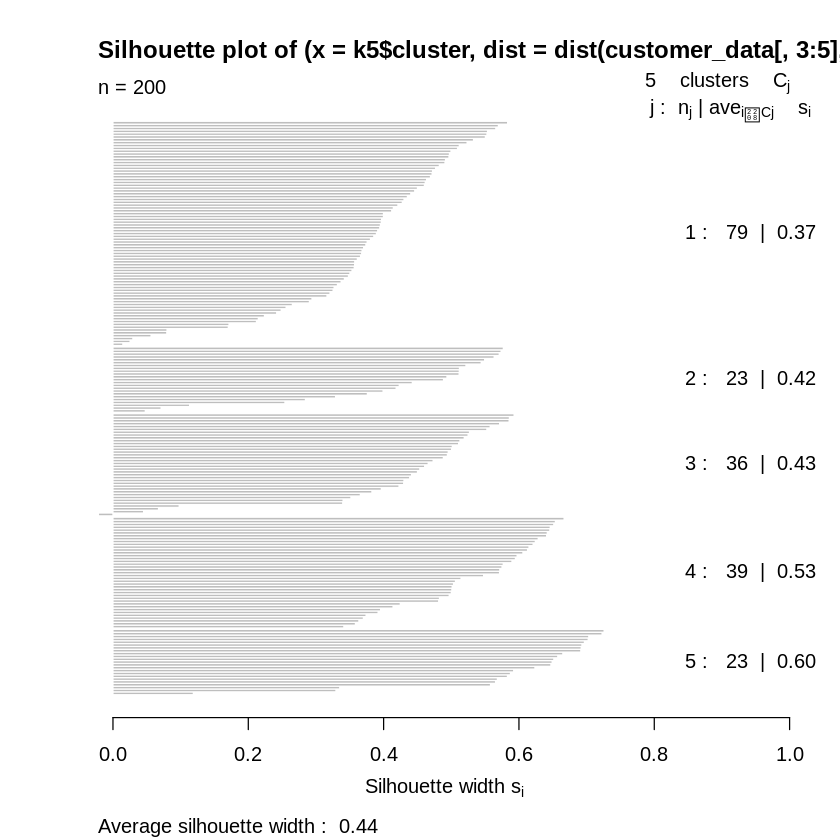

In [137]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

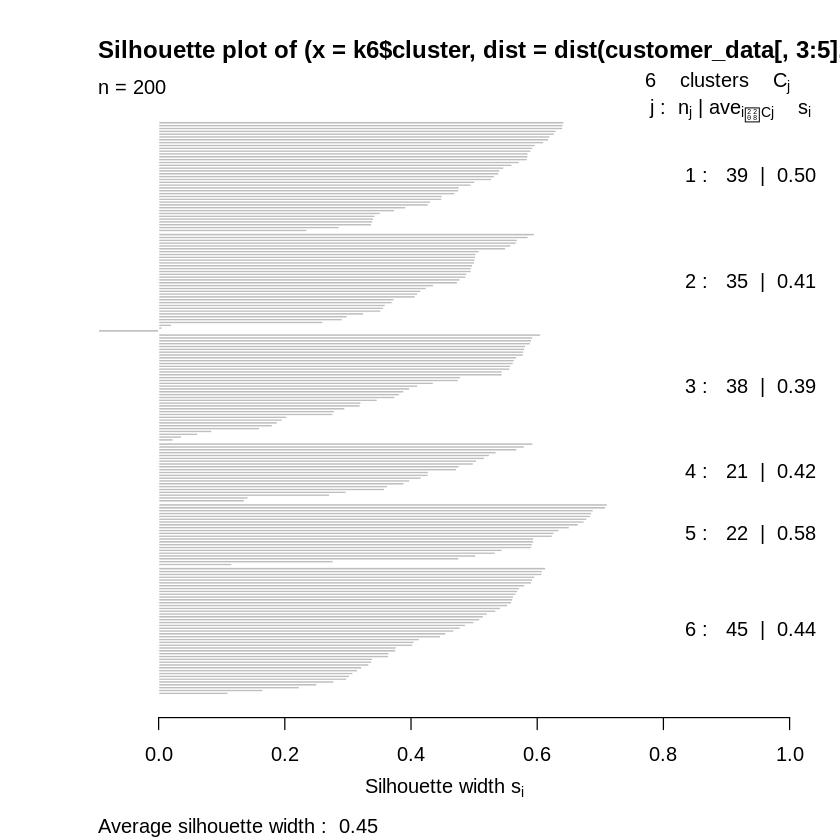

In [138]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

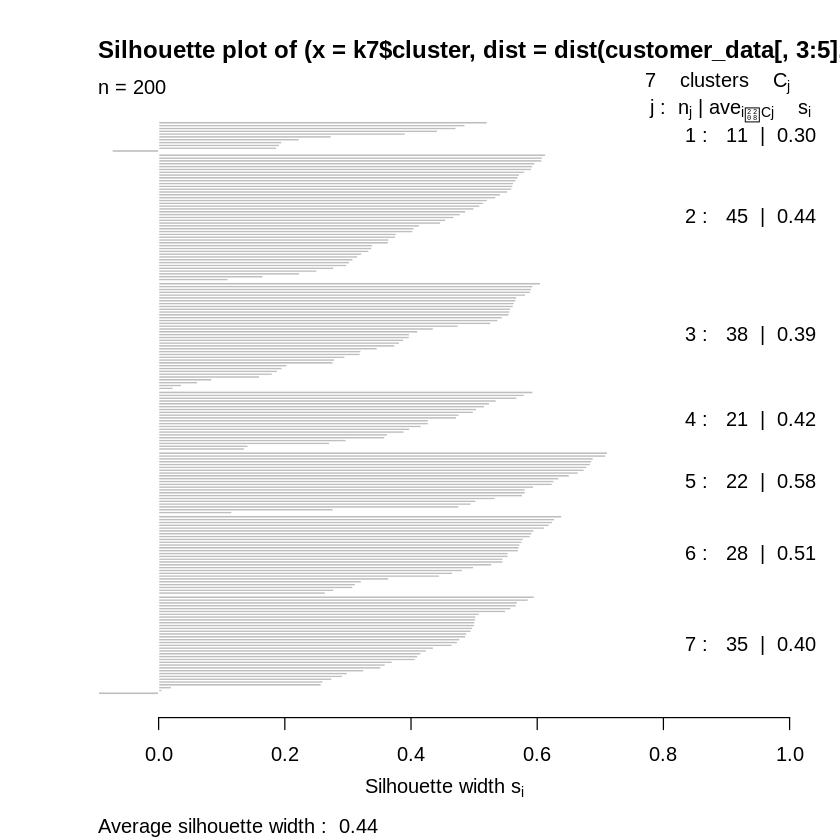

In [139]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

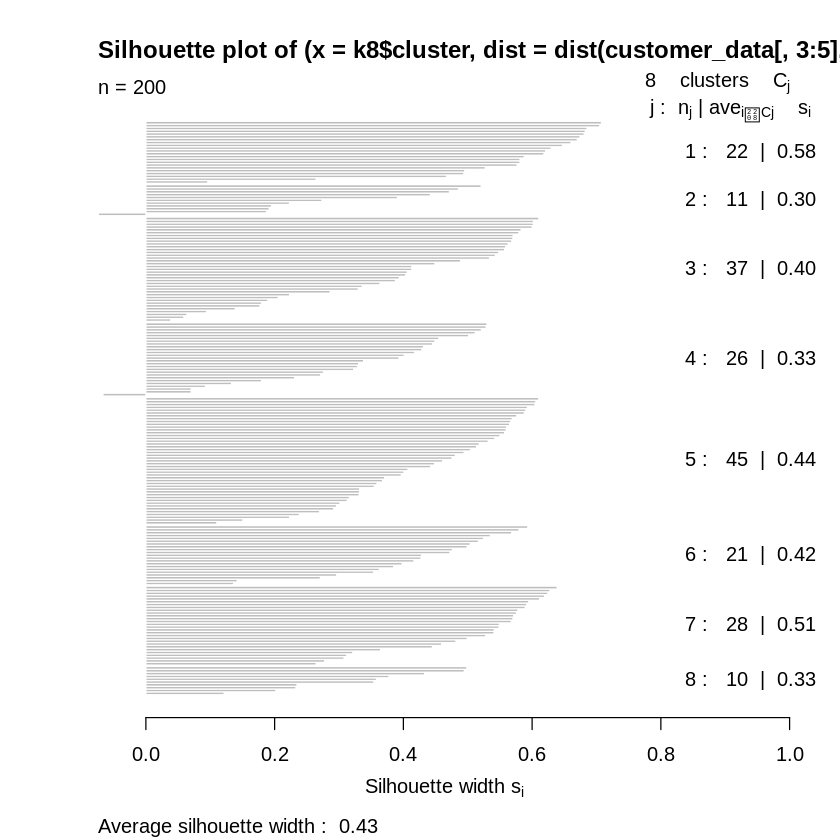

In [140]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

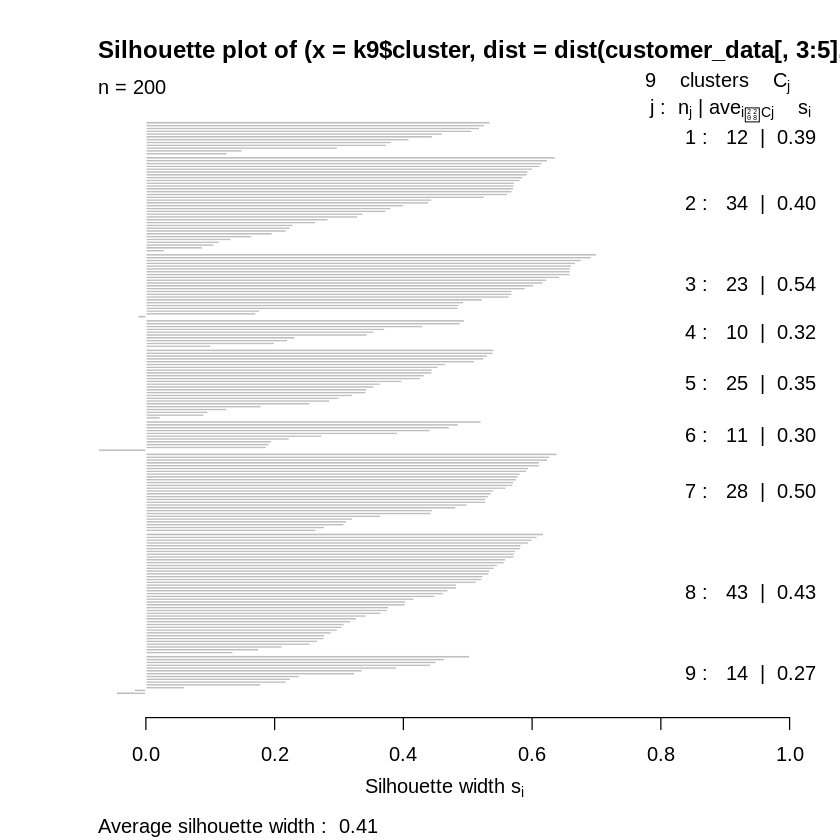

In [141]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

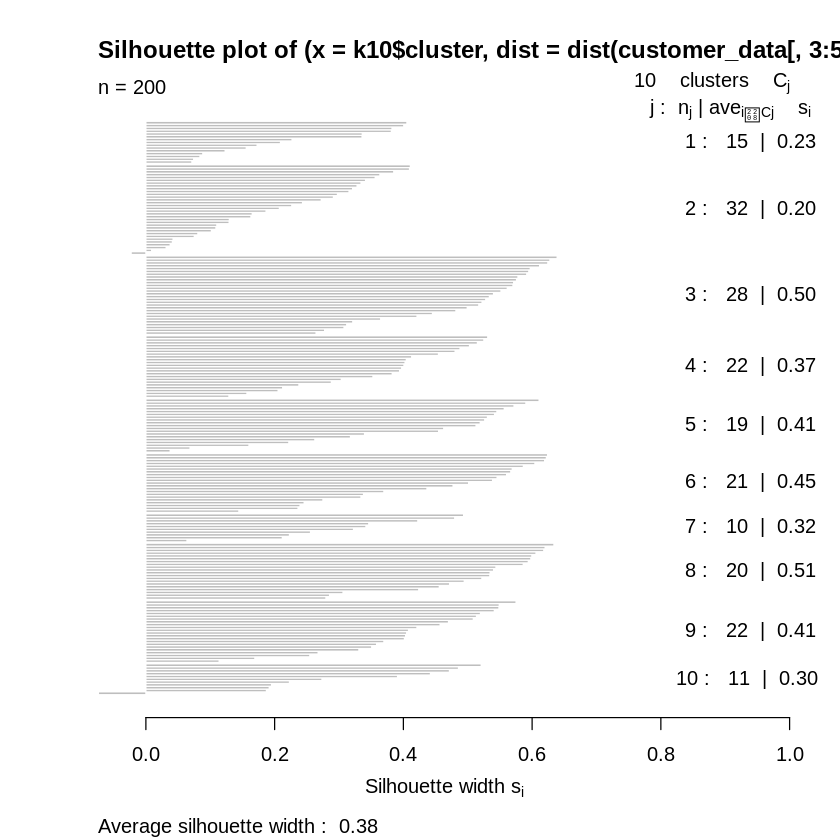

In [142]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [143]:
install.packages("NbClust")
install.packages("factoextra")
library(NbClust)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



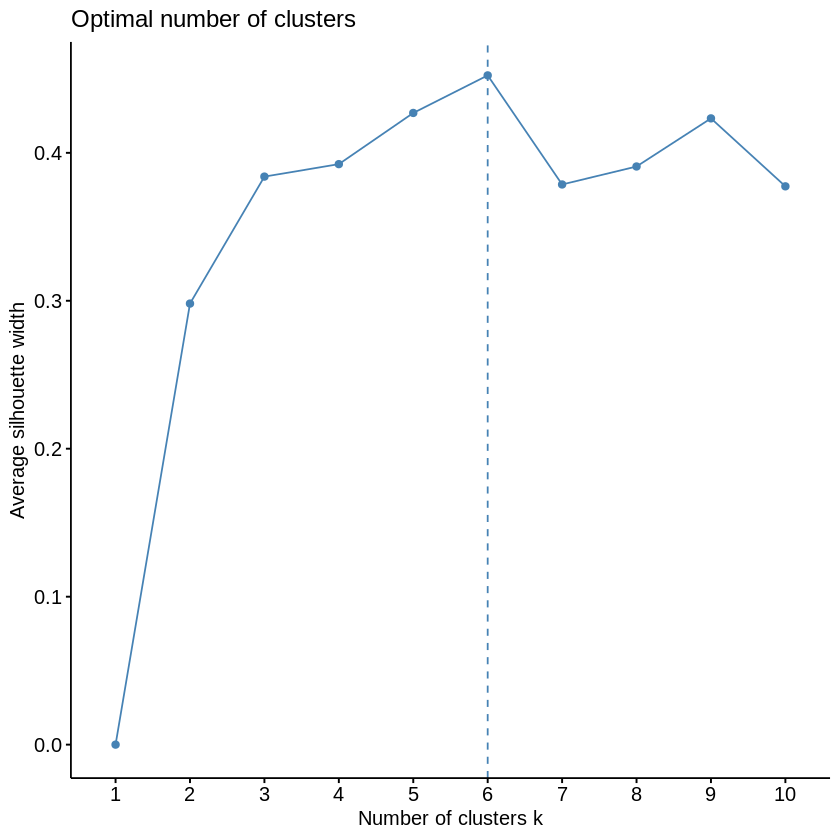

In [144]:
fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

**K-mean Algorithm**
3. Gap Statistic Method

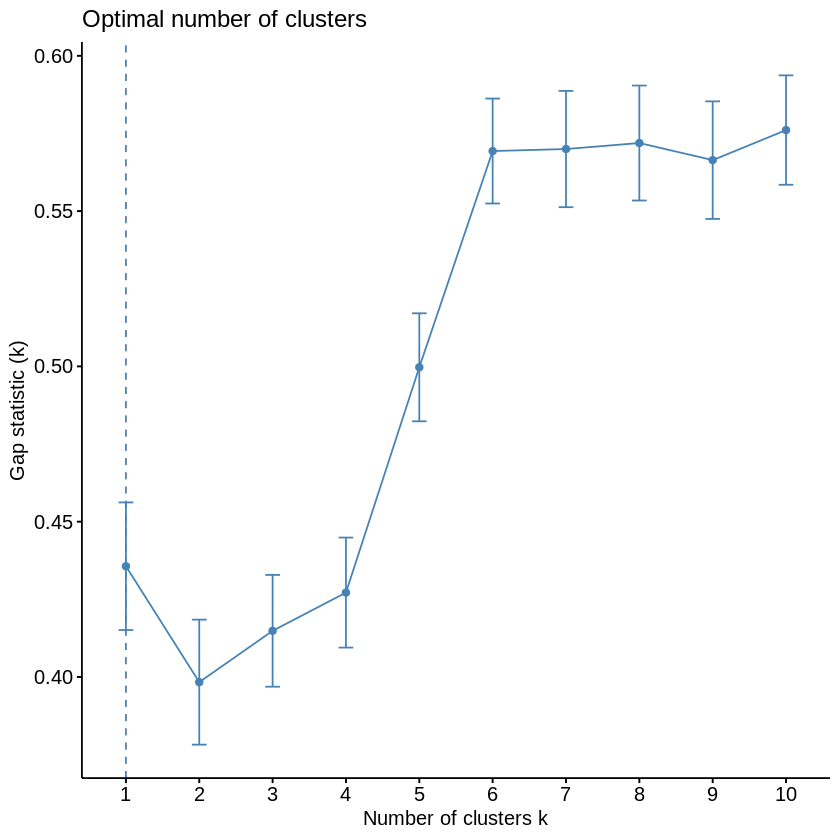

In [145]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [146]:
#let us take k = 6 as our optimal cluster
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 45, 22, 21, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 25.27273           25.72727               79.36364
3 44.14286           25.14286               19.52381
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  8062.133  4099.818  7732.381  7742.895 166

**Visualizing the Clustering Results using the First Two Principle Components**

In [147]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE)
summary(pcclust)

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

In [148]:
pcclust$rotation[,1:2]

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


In [149]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



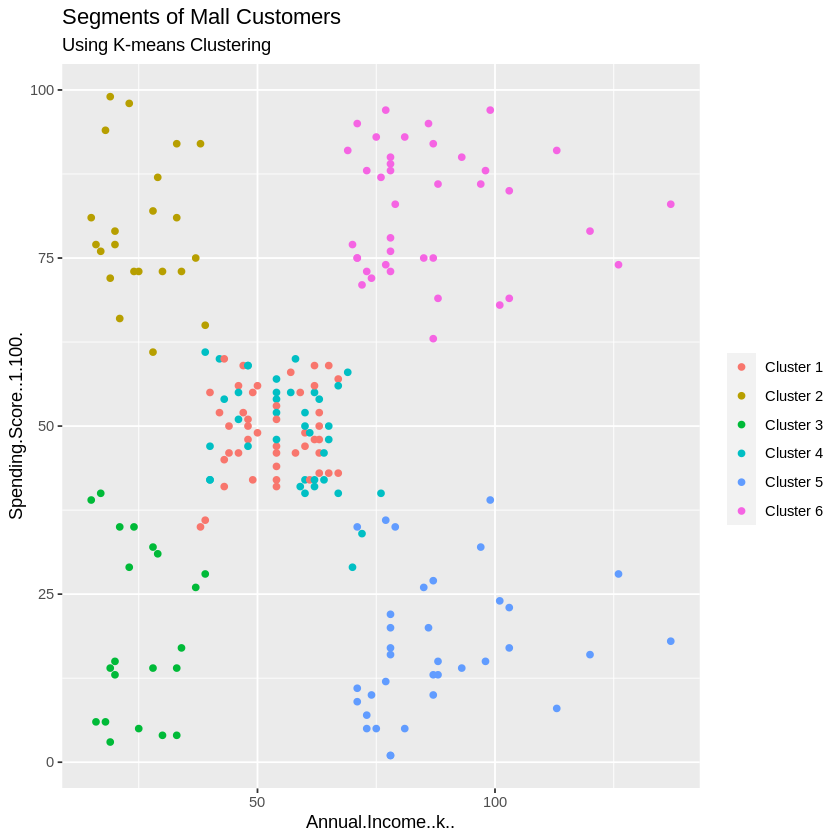

In [150]:
#Visualize
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

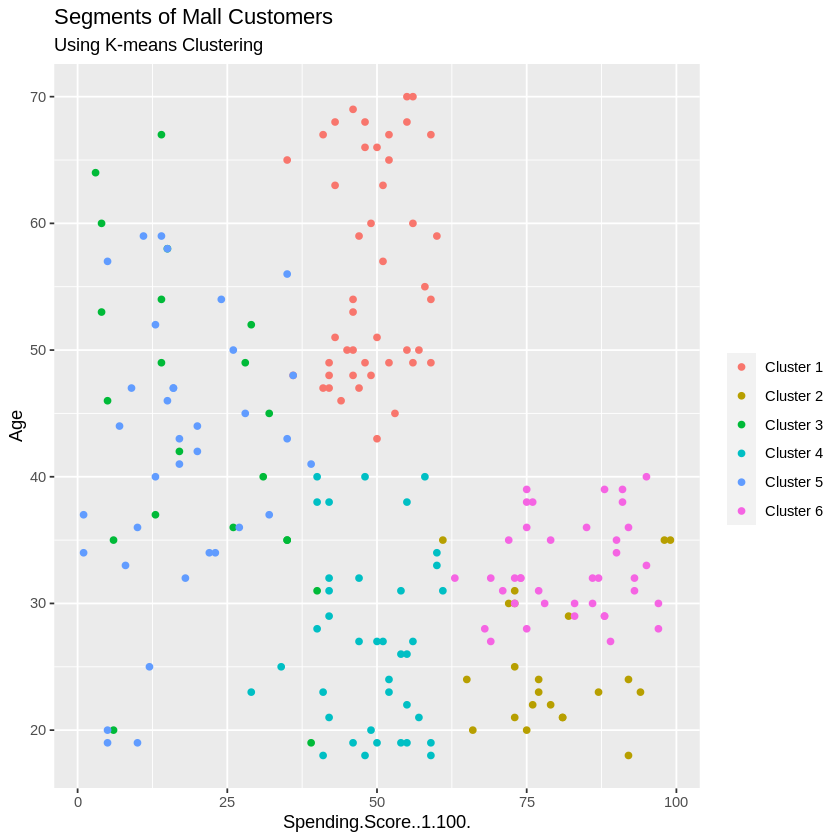

In [151]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

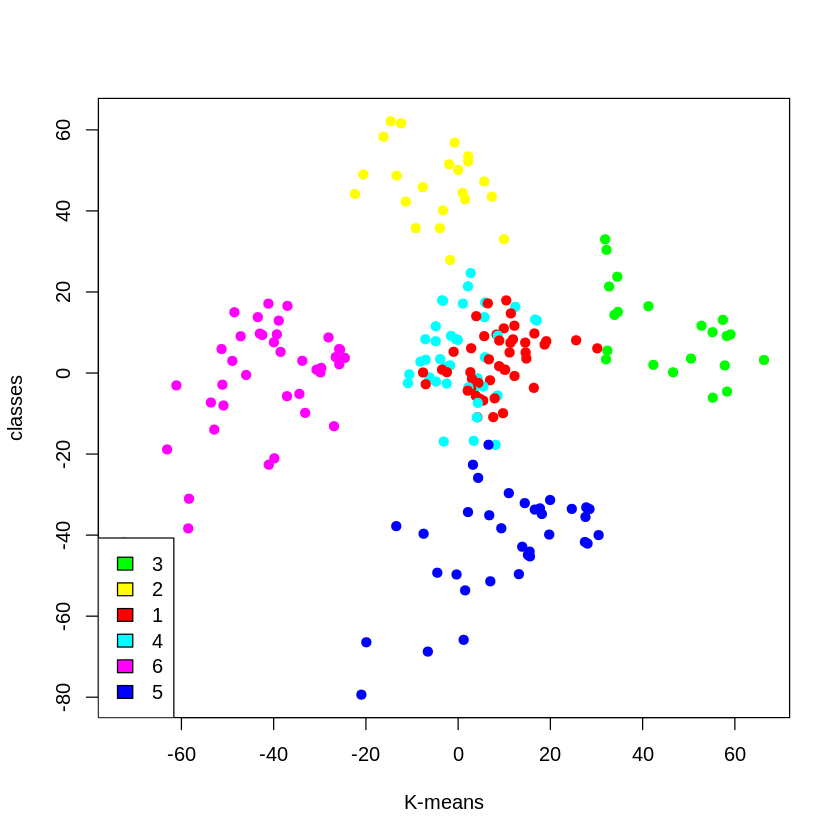

In [152]:
#finally visualize K mean values
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))